--- Step 1: Dataset Loaded ---
--- Step 2: Columns Selected ---
--- Step 3: Label Encoding Completed ---
--- Step 4-6: Data Split and Scaled ---
--- Step 7: Model Training Completed ---

--- Step 8: Model Evaluation Results ---
Accuracy Score: 100.00%

Classification Report:
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00     20949
    Low Risk       1.00      1.00      1.00     19055

    accuracy                           1.00     40004
   macro avg       1.00      1.00      1.00     40004
weighted avg       1.00      1.00      1.00     40004

--- Step 9: Confusion Matrix Saved as 'confusion_matrix.png' ---
--- Step 10: Preprocessed CSV Saved as 'final_preprocessed_vital_signs.csv' ---

--- Example Prediction ---
Predicted Risk: Low Risk


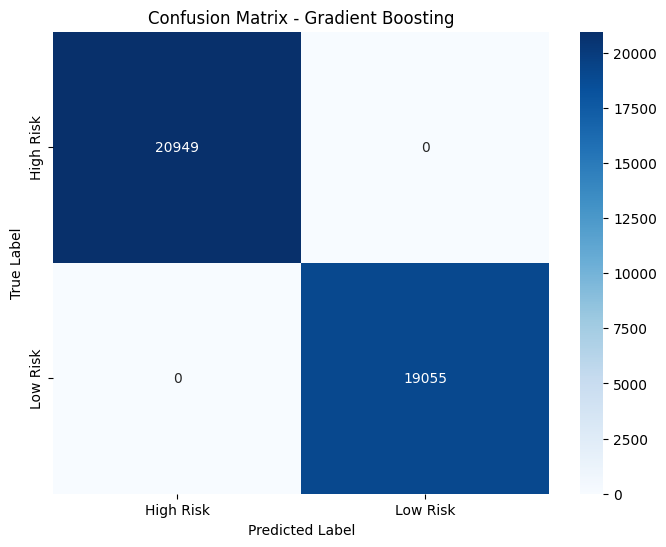

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the dataset
file_path = '/content/human_vital_signs_dataset_2024.csv'
df = pd.read_csv(file_path)
print("--- Step 1: Dataset Loaded ---")

# 2. Preprocessing: Select relevant columns
selected_cols = [
    'Heart Rate', 'Body Temperature', 'Oxygen Saturation',
    'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Age',
    'Gender', 'Weight (kg)', 'Height (m)', 'Derived_BMI', 'Risk Category'
]
df = df[selected_cols]
print("--- Step 2: Columns Selected ---")

# 3. Handle Categorical Data: Label Encoding
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

le_risk = LabelEncoder()
df['Risk Category'] = le_risk.fit_transform(df['Risk Category'])
print("--- Step 3: Label Encoding Completed ---")

# 4. Define Features (X) and Target (y)
X = df.drop('Risk Category', axis=1)
y = df['Risk Category']

# 5. Split the data into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature Scaling: Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("--- Step 4-6: Data Split and Scaled ---")

# 7. Model Building: Gradient Boosting (Best Performing Model)
boost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=25)
boost_model.fit(X_train_scaled, y_train)
print("--- Step 7: Model Training Completed ---")

# 8. Model Evaluation
y_pred = boost_model.predict(X_test_scaled)
print("\n--- Step 8: Model Evaluation Results ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_risk.classes_))

# 9. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_risk.classes_,
            yticklabels=le_risk.classes_)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
print("--- Step 9: Confusion Matrix Saved as 'confusion_matrix.png' ---")

# 10. Save the final preprocessed data
X_full_scaled = scaler.fit_transform(X)
df_final = pd.DataFrame(X_full_scaled, columns=X.columns)
df_final['Risk Category'] = y.values
df_final.to_csv('final_preprocessed_vital_signs.csv', index=False)
print("--- Step 10: Preprocessed CSV Saved as 'final_preprocessed_vital_signs.csv' ---")

# 11. Prediction Function for New Data
def predict_risk(hr, temp, oxygen, sbp, dbp, age, gender, weight, height, bmi):
    """
    Function to predict risk category based on manual input.
    """
    # Create sample DataFrame
    sample = pd.DataFrame([[hr, temp, oxygen, sbp, dbp, age, gender, weight, height, bmi]],
                          columns=X.columns)

    # Encode Gender
    sample['Gender'] = le_gender.transform(sample['Gender'])

    # Scale Sample
    sample_scaled = scaler.transform(sample)

    # Predict
    pred_id = boost_model.predict(sample_scaled)
    return le_risk.inverse_transform(pred_id)[0]

# Example Usage:
print("\n--- Example Prediction ---")
example_result = predict_risk(80, 37.0, 98.0, 120, 80, 30, 'Male', 70.0, 1.75, 22.8)
print(f"Predicted Risk: {example_result}")